<hr/>

# Intro to Data Science -- Exam 2

<hr/>

# <h2><font color="darkblue">Exam 2</font></h2>

## Instructions (PLEASE READ CAREFULLY)

#### Deadline



The exam is available from 7AM and is due by 9PM EST (Baltimore Time) on Wednesday, 18 Nov 2020. *Please note that the link to submit will disappear at midnight, and absolutely no submissions will be accepted after this time; any work received between the 9PM deadline and midnight will be denoted as "late" and penalized accordingly.*

You have 85 minutes to complete the exam from the time you access it on Blackboard (75 minutes to work on the exam itself, 10 minutes to correctly submit the exam and read these instructions).

Please indicate the time you downloaded the exam: START TIME 18:02

And the time you finished it: END TIME 19:13
    
#### Submission Instructions
Submit your work as a SINGLE ipynb document. Please check that you have correctly submitted the correct document; we have enabled up to three submission attempts to give you a few opportunties to ensure this.

####  Work alone!
Feel free to use the lecture notes and other resources but work on your own!

#### Short answers
Please justify all short answers with a brief explanation.

#### Python Packages
You may use pandas, numpy, and ScikitLearn

In [46]:
%pylab inline
import pandas as pd
import numpy as np
import sklearn

Populating the interactive namespace from numpy and matplotlib


## Problem 1

Simone is attempting to implement a collection of methods she learned in her data science course, with the goal of recovering the group memberships (the x column of 'labels.csv') of the rows of an example data matrix ('X.csv').

1. Load in both .csv files and plot the data colored according to the true group memberships. (2 pts)
2. Suppose we want to compare the results of LDA, 3-NN, and Random Forest classifiers (max_depth = None, n_estimators = 20). Which of these do you think is most appropriate for this collection of data, and why? (2 pt)
3. Perform 10-fold cross validation for each the three methods; which method most accurately recovers the group memberships? (4 pts)
4. Run each method and plot the results, including any decision boundaries. Use the first 10 and last 10 rows of X as the test data. (4 pts)
5. Do the results agree with your assessment in part 2? (1 pt)

Total of 13 points

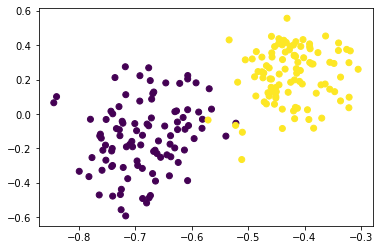

In [47]:
X = np.loadtxt("X.csv", delimiter = ",")
df_label = pd.read_csv("labels.csv")
C = list(df_label['x'])
C = np.array(C)
plt.scatter(X[:,0],X[:,1],c=C);

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [49]:
# For Problem 1, Question 2. Please use following KFold valuation
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10,shuffle=True,random_state=42)

scores1 = []
for train, test in k_fold.split(X):
    clf1 = LDA()
    clf1.fit(X[train],C[train])
    score = clf1.score(X[test],C[test])
    scores1.append(score)
s1 = np.array(scores1)
print ('LDA', s1.mean(), s1.std(), s1.min())

scores2 = []
for train, test in k_fold.split(X):
    clf2 = neighbors.KNeighborsClassifier(3)
    clf2.fit(X[train],C[train])
    score = clf2.score(X[test],C[test])
    scores2.append(score)
s2 = np.array(scores2)
print ('3-NN', s2.mean(), s2.std(), s2.min())

scores3 = []
for train, test in k_fold.split(X):
    clf3 = RandomForestClassifier(n_estimators=20,max_depth=None)
    clf3.fit(X[train],C[train])
    score = clf3.score(X[test],C[test])
    scores3.append(score)
s3 = np.array(scores3)
print ('RandomForest', s3.mean(), s3.std(), s3.min())

LDA 0.985 0.02291287847477922 0.95
3-NN 0.9749999999999999 0.025000000000000022 0.95
RandomForest 0.97 0.033166247903554005 0.9


LDA is most appropriate, it has highest mean of accuracy(0.985).

In [50]:
clf1 = LDA()
score1 = cross_val_score(clf1, X, C, cv=10)    
print("For LDA classifier, accuracy with 10-fold: %0.4f (+/- %0.4f)" % ( mean(score1), std(score1) * 1.96))

clf2 = neighbors.KNeighborsClassifier(3)
score2 = cross_val_score(clf2, X, C, cv=10)    
print("For 3-NN classifier, accuracy with 10-fold: %0.4f (+/- %0.4f)" % ( mean(score2), std(score2) * 1.96))

clf3 = RandomForestClassifier(n_estimators=20,max_depth=None)
score3 = cross_val_score(clf3, X, C, cv=10) 
print("For RandomForestClassifier, accuracy with 10-fold: %0.4f (+/- %0.4f)" % ( mean(score3), std(score3) * 1.96))

For LDA classifier, accuracy with 10-fold: 0.9850 (+/- 0.0449)
For 3-NN classifier, accuracy with 10-fold: 0.9800 (+/- 0.0480)
For RandomForestClassifier, accuracy with 10-fold: 0.9700 (+/- 0.0650)


LDA has most accurate result(0.9850).

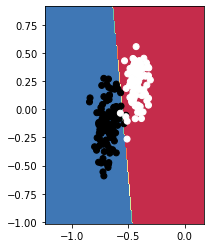

In [52]:
X0 = np.concatenate((X[:10],X[-10:]),axis=0)
h = 0.01
x,y = meshgrid(arange(X0[:,0].min()-.5, X0[:,0].max()+.5, h),
               arange(X0[:,1].min()-.5, X0[:,1].max()+.5, h))
grid = np.c_[x.ravel(),y.ravel()]

z1 = clf1.fit(X,C).predict(grid).reshape(x.shape)

figure(figsize=(4,4)); subplot(111,aspect='equal')
contourf(x,y,z1, cmap=cm.Spectral_r)
scatter(X[:,0],X[:,1], c=C, cmap=cm.gray);

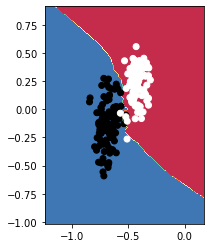

In [53]:
z2 = clf2.fit(X,C).predict(grid).reshape(x.shape)

figure(figsize=(4,4)); subplot(111,aspect='equal')
contourf(x,y,z2, cmap=cm.Spectral_r)
scatter(X[:,0],X[:,1], c=C, cmap=cm.gray);

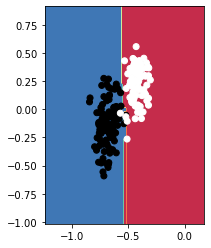

In [54]:
z3 = clf3.fit(X,C).predict(grid).reshape(x.shape)

figure(figsize=(4,4)); subplot(111,aspect='equal')
contourf(x,y,z3, cmap=cm.Spectral_r)
scatter(X[:,0],X[:,1], c=C, cmap=cm.gray);

The result from the picture is consistent with conclusion in the previous part.

## Problem 2

Simone has finished her first and admittedly somewhat naive implementation of a new algorithm that she read about online. The script below tests it on a simple dataset. What is she trying to do? Feel free to split the cell to study the different intermediate data products and/or print the shape or content of the calculated arrays to understand the logic.

1. Run the analysis to create the final figure. (1 pt)
1. Read, understand and comment the code line by line. (4 pts)
1. What does this algorithm do? Would you consider this clustering or classification? (2 pts)
1. Color the data points in the top figures to better illustrate the intermediate results. (2 pts)
1. Interpret the figures. Does Simone's method seem to work for this dataset? (3 points)

Total of 12 points

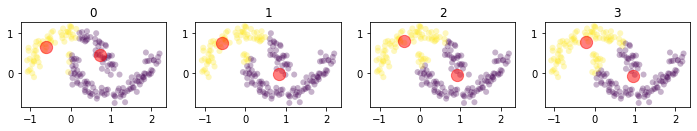

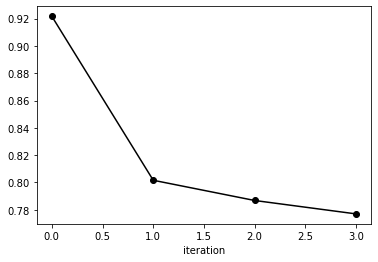

In [55]:
from sklearn import datasets # test data
np.random.seed(65536) #generate random seed
X,_ = datasets.make_moons(n_samples=200, noise = .1) #create make moon dataset

# initialize
idx = np.random.randint(X.shape[0], size=2) #generate 2 random indexes
C = X[idx,:] #let C be the 2 indexes generated beforeand use it as the initial center points
cost = [] #let cost be empty list used to store L1 distance

figure(figsize=(12,3)) #set size of figures
for i in range(4): #loop through i 4 times to optimize centers and plot 4 pictures
    v = C[:,np.newaxis,:] - X[np.newaxis,:,:] #let v be the distance between each 2 centers and data points
    a = np.abs(v).sum(axis=2) # L1 distances
    label = (a[0,:] < a[1,:]) #let label be a boolean value to determine which center the data point is closer to
    # plot
    subplot(1, 4, i+1, aspect='equal'); title(i) #create 4 subplots
    scatter(X[:,0], X[:,1], c=label, alpha=0.3, edgecolor='none') #plot data points
    scatter(C[:,0], C[:,1], c='r', alpha=0.5, s=150) #plot the 2 centers
    # update
    C[0,:] = np.median(X[label,:], axis=0) #set first new center to be median of data points closer to original first center
    C[1,:] = np.median(X[np.logical_not(label),:], axis=0) #set second new center to be median of data points closer to original second center
    cost.append(np.min(a,axis=0).mean()) #store average of minimum L1 distance into cost
    
figure(); plot(cost,'ko-'); xlabel('iteration'); #plot list of cost stored before

It is a 4-step algorithm to do clustering with 2 centers. It starts with 2 random centers, then modify the centers in each later step to be the median of points that are closer to the original center than the other original center.

Yes, this method works. From the plot of data points, we can see the two centers converge to what we desired with each step. From the graph of cost function, it keeps decreasing and tend to converge after second or third step.